# Assignment 3

##### INF412: Data Analytics - Informed Decisions with Data 
Luca Carnegie

In [24]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



##### 1. Multiple Linear Regression (6 points)
The Winequality dataset (‘winequality.csv’) contains physicochemical properties of white wine
samples and their corresponding quality ratings. The columns and their descriptions are at below.

| Feature Name | Description |
|-------------|-------------|
| fixed acidity | The amount of non-volatile acids in wine (e.g., tartaric acid). Affects wine's taste and stability. |
| volatile acidity | The amount of acetic acid in wine. High values may lead to an unpleasant vinegar taste. |
| citric acid | A natural preservative found in wine, adding freshness and reducing oxidation. |
| residual sugar | The sugar left after fermentation. Affects sweetness; wines with high values are sweeter. |
| chlorides | The amount of salt in wine. Higher values may contribute to a salty taste. |
| free sulfur dioxide | The SO₂ available in wine to prevent microbial growth and oxidation. |
| total sulfur dioxide | The total SO₂ present (bound + free). Excessive levels can cause undesirable aromas. |
| density | The wine's mass per unit volume, influenced by sugar, alcohol, and other dissolved substances. |
| pH | The measure of acidity or alkalinity. Lower values indicate higher acidity. |
| sulphates | A compound that contributes to wine preservation and enhances bitterness. |
| alcohol | The ethanol content in wine (%). Affects body, aroma, and overall sensory experience. |
| quality | Wine quality score (integer from 3 to 9) based on sensory analysis by wine tasters. |

##### Load and Explore the Dataset

In [18]:
# Load the dataset into a Pandas DataFrame. 
wine = pd.read_csv('winequality.csv')

# Load the dataset into a Pandas DataFrame. 
wine = pd.read_csv('winequality.csv', sep=';')

# Display the first five rows, column names, and data types in a more attractive format
print("\n===== FIRST 5 ROWS OF THE DATASET =====")
print(wine.head(5))

print("\n===== COLUMN NAMES =====")
for i, col in enumerate(wine.columns):
    print(f"{i+1}. {col}")

print("\n===== DATA TYPES =====")
dtypes_df = pd.DataFrame(wine.dtypes, columns=['Data Type'])
dtypes_df.index.name = 'Column'
print(dtypes_df)

# Display basic dataset dimensions
print(f"\n===== DATASET DIMENSIONS =====")
print(f"Number of samples: {wine.shape[0]}")
print(f"Number of features: {wine.shape[1]}")


===== FIRST 5 ROWS OF THE DATASET =====
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1

In [19]:
# Print summary statistics
print("\n===== SUMMARY STATISTICS =====")
print(wine.describe())


===== SUMMARY STATISTICS =====
Column  fixed acidity  volatile acidity  citric acid  residual sugar  \
count     4898.000000       4898.000000  4898.000000     4898.000000   
mean         6.854788          0.278241     0.334192        6.391415   
std          0.843868          0.100795     0.121020        5.072058   
min          3.800000          0.080000     0.000000        0.600000   
25%          6.300000          0.210000     0.270000        1.700000   
50%          6.800000          0.260000     0.320000        5.200000   
75%          7.300000          0.320000     0.390000        9.900000   
max         14.200000          1.100000     1.660000       65.800000   

Column    chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count   4898.000000          4898.000000           4898.000000  4898.000000   
mean       0.045772            35.308085            138.360657     0.994027   
std        0.021848            17.007137             42.498065     0.002991   
min

In [20]:
# Identify and handle missing values (if any)
print(wine.isnull().sum())

Column
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


It appears that there are no missing values, which makes our life easy.

<Axes: xlabel='Column', ylabel='Column'>

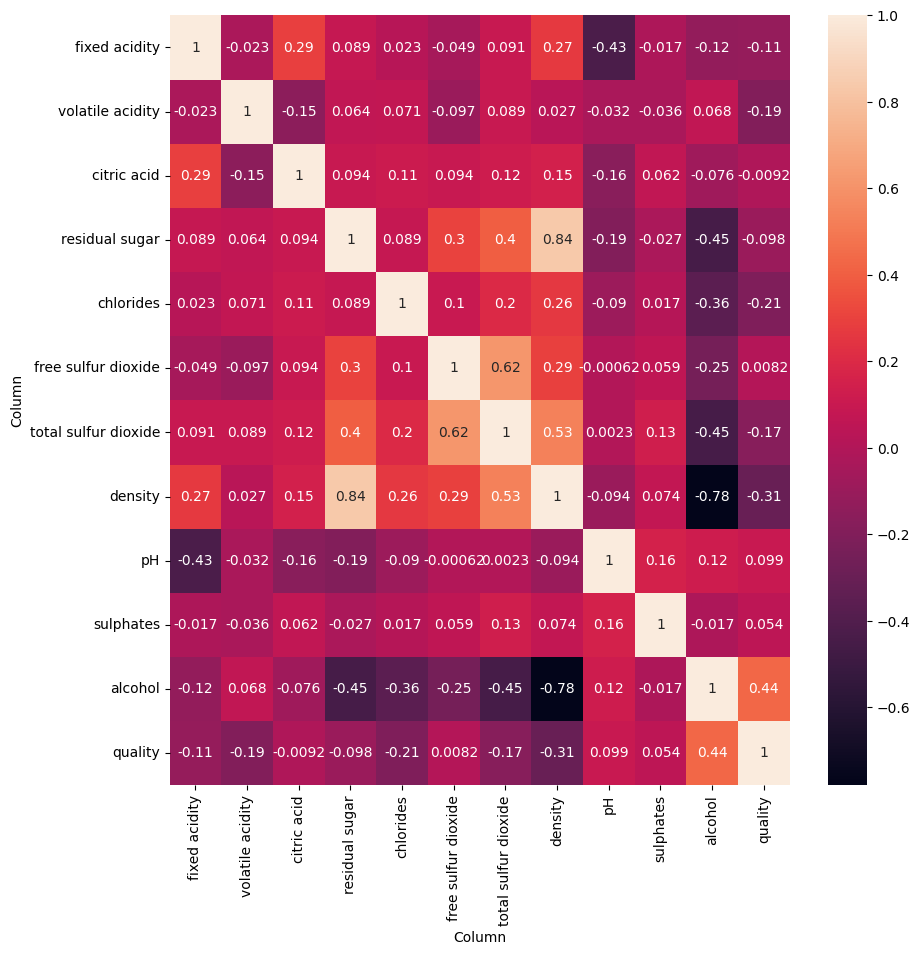

In [21]:
# Compute the correlation matrix between variables and create visualization with seaborn.
corr_matrix = wine.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)


Looking at the variable descriptions and the correlation matrix, we can see a few preliminary relationships between certain variables, from positive to negative. We'll say that for a correlation between variables to be 'significant', it should be above 0.5 (i.e. at least 50% of the variance in one variable is explained by the other)

**Positive:**
1. There is a large positive relationship between **density** and **residual sugar** (+0.84), which makes sense since sugar left in the wine would increase it's g/mL. 
2. There is a decent positive relationship between **free sulfur dioxide** and **total sulfer dioxide** (+0.62)
3. There is a decent positive relationship between **total sulfur dioxide** and **density** (+0.53)

**Negative:**
1. There is a high negative relationship (-0.78) between **alcohol** and **density**

##### Performing Multiple Linear Regression (MLR)

Identify independent (X) and dependent (y) variables:
- **Our goal:** find what factors affect the variable 'quality'
- **Dependent variable:** quality
- **Independent variables:** fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality

In [32]:
# Split the dataset into training (80%) and testing (20%) subsets.

# Shuffle rows (to remove problems, if any, due to ordering)
wine = wine.sample(frac=1).reset_index(drop=True)

# Split the dataset into features and target variable
Y = wine['quality']
X = wine.drop('quality', axis=1)

# Split the dataset into training (80%) and testing (20%) subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Add constant to the training and testing sets
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [ ]:
# train a linear regression model with sci-kit-learn
model = LinearRegression()
model.fit(X_train, Y_train)

# Fit the same regression model with statsmodels
model_sm = sm.OLS(Y_train, X_train_sm).fit()

# Model summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     134.8
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          4.43e-263
Time:                        16:48:35   Log-Likelihood:                -4435.3
No. Observations:                3918   AIC:                             8895.
Df Residuals:                    3906   BIC:                             8970.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  140.4012 

# 